Brave search: simple gradient tape model<br>
https://www.linkedin.com/pulse/gradient-tape-deploy-descent-tensorflow-vu-hong-quan<br>
https://github.com/quanvu0996/data_science/blob/main/tf/gradient_tape1_en.ipynb

In [87]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [88]:
def pretty_print(model):
    for layer in model.layers:
        weights, biases = layer.get_weights()
        print(f"Layer: {layer.name}")
        print(f"Weights: {weights}")
        print(f"Bias: {biases}")

In [89]:
def make_plot(number, X, Y):

    #add points to plot
    plt.scatter(X, Y, color='purple')

    #add line of best fit to plot

    line_x=tf.expand_dims([0,1,2,3,4,5,6,7,8],-1)
    line_y=model.predict(X)
    # print(line_y)
    plt.plot(line_x, line_y, color='steelblue', linestyle='--', linewidth=2)
    # plt.scatter(line_x, line_y, color='steelblue')
    for layer in model.layers:
        weights, biases = layer.get_weights()
    ptext = "weight=%0.2f    bias=%0.2f" % (weights[0][0],biases[0])
    # print(ptext)
    #add fitted regression equation to plot
    plt.text(1, 2.5, ptext)

    # plt.close()

without debug statements

In [90]:
X = tf.constant([1., 4., 6, 3, 3, 4, 5, 6, 7])
Y = tf.constant([0.25, 1.2, 0.79, 0.52, 1.6, 1.7, 1.9, 2, 2])

# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, 
    kernel_initializer='zeros', 
    bias_initializer='zeros')
])

optimizer= tf.optimizers.Adam(learning_rate = .07)

def train_step2(x_true, y_true):
    with tf.GradientTape(persistent =True) as tape:
        # Find prediction value and calculate loss value
        y_pred = model(tf.expand_dims(X,-1))
        loss = loss_fn( tf.expand_dims(Y, -1), y_pred)
        print("Loss: ", loss.numpy())
 
    # calculate partial gradient by each parameter
    variables = model.trainable_variables 
    gradients = tape.gradient(loss, variables)
 
    # update value of each parameter: w1 = w0 - learning_rate * d(loss)/dw
    optimizer.apply_gradients(zip(gradients, variables))

for i in range(5):
    print("Epoch: ", i)
    train_step2(X, Y)     

Epoch:  0
Loss:  19.457
Epoch:  1
Loss:  10.991247
Epoch:  2
Loss:  5.402445
Epoch:  3
Loss:  2.563472
Epoch:  4
Loss:  2.0541918


with debug statements

Epoch:  0
Loss:  19.457
Layer: dense_33
Weights: [[0.]]
Bias: [0.]
1/1 [==============================] - 0s 36ms/step
Epoch:  1
Loss:  10.991247
Layer: dense_33
Weights: [[0.06999953]]
Bias: [0.06999952]
1/1 [==============================] - 0s 14ms/step
Epoch:  2
Loss:  5.402445
Layer: dense_33
Weights: [[0.13847694]]
Bias: [0.13849366]
1/1 [==============================] - 0s 15ms/step
Epoch:  3
Loss:  2.563472
Layer: dense_33
Weights: [[0.20339632]]
Bias: [0.20347738]
1/1 [==============================] - 0s 14ms/step
Epoch:  4
Loss:  2.0541918
Layer: dense_33
Weights: [[0.261599]]
Bias: [0.26184723]
1/1 [==============================] - 0s 16ms/step
0.3091148


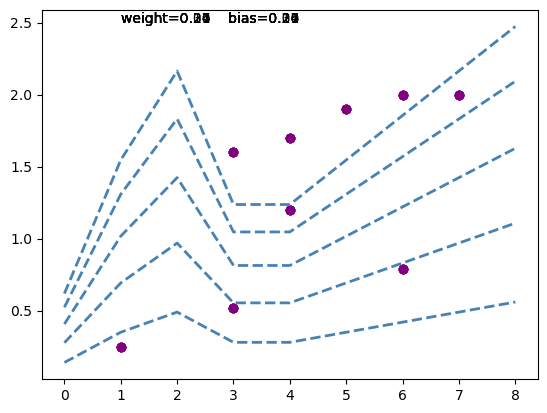

In [99]:
import tensorflow as tf
from keras.utils import plot_model

X = tf.constant([1., 4., 6, 3, 3, 4, 5, 6, 7])
Y = tf.constant([0.25, 1.2, 0.79, 0.52, 1.6, 1.7, 1.9, 2, 2])

# Define the loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

model = tf.keras.Sequential([
    tf.keras.layers.Dense( 1, 
    kernel_initializer='zeros', 
    bias_initializer='zeros')
])

optimizer= tf.optimizers.Adam(learning_rate = .07)

def train_step2(x_true, y_true):
    with tf.GradientTape(persistent =True) as tape:
        # Find prediction value and calculate loss value
        y_pred = model(tf.expand_dims(X,-1))
        loss = loss_fn( tf.expand_dims(Y, -1), y_pred)
        print("Loss: ", loss.numpy())
 
    # calculate partial gradient by each parameter
    variables = model.trainable_variables 
    # print(model.trainable_variables) 
    pretty_print(model)
    gradients = tape.gradient(loss, variables)
 
    # update value of each parameter: w1 = w0 - learning_rate * d(loss)/dw
    optimizer.apply_gradients(zip(gradients, variables))

# for i in range(5):
for i in range(5):
    print("Epoch: ", i)
    train_step2(X, Y)
    make_plot(i,X, Y)

for layer in model.layers:
    weights, biases = layer.get_weights()
print(weights[0][0])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (9, 1)                    2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


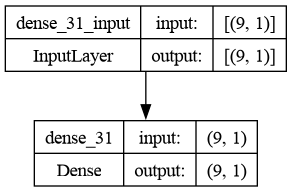

In [92]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Why expand_dims? model expects a two-dimensional input, but X is only one-dimensional.
tf.expand_dims() adds a dimension.

In [93]:
X = tf.constant([1., 4., 6, 3, 3, 4, 5, 6, 7])

print(X.shape)
expanded=tf.expand_dims(X,-1)
print(expanded.shape)

(9,)
(9, 1)
